<a href="https://colab.research.google.com/github/eckoecho/Prediction-of-Product-Sales/blob/Version-2/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





#**Prediction of Product Sales**
**Author:**Echo Diaz

**Last Updated:** May 2023


# **Project Overview**


## Imports

In [2]:
#Importing the necessary libraries
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split

## **Load and Inspect Data**

In [3]:
#Setting the path to pull our data
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [4]:
#Converting our CSV into a dataframe
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Checking for various aspects: column & row count, data types, and any nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Data Cleaning**

### Overview of Our Data

In [6]:
#Looking at the numbr of rows and columns
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 8523 rows and 12 columns.


In [7]:
#Data Types for Each Feature
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

7 columns have objects as their data types.
5 columns have floats as their data types.
1 column is an integer as their data type.

### Drop Duplicates

In [8]:
#Checking for duplicates within all rows
duplicated_rows = df.duplicated()
duplicated_rows.sum()

0

There are no duplicates to drop.

In [9]:
#Looking throughout the rows for nulls
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The results show 2 columns with missing data: 
- `Item_Weight` 
- `Outlet_Size`

In [10]:
#This allows me to see if i should drop any columns with a lot of missing data
null_percentage = null_sums/len(df) * 100
null_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

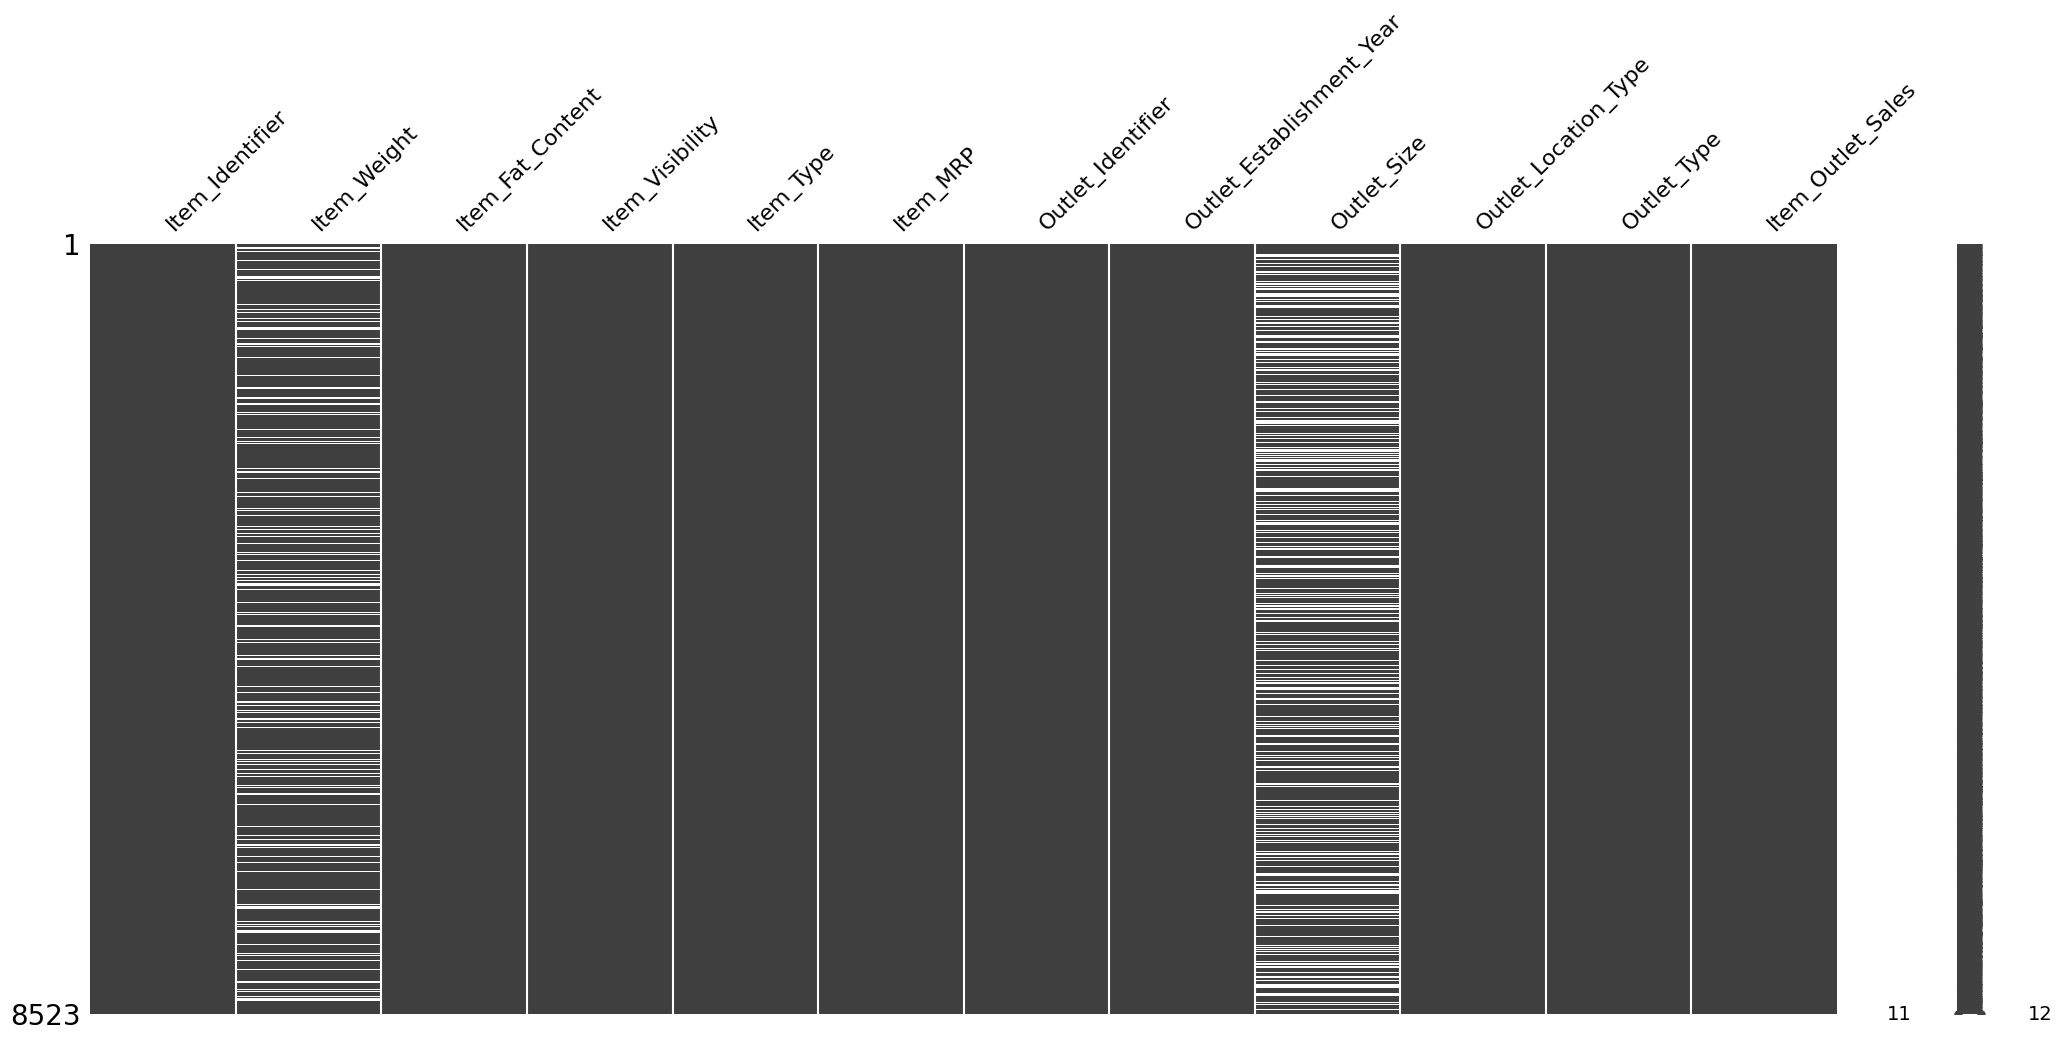

In [11]:
#A quick visualization of where the nulls equal white spaces
#This corresponds with out perecntages above
msno.matrix(df);

### Categorical Columns Cleaning

In [12]:
#Fixing string inconsistencies
#First, obtaining all features with string values
str_cols = df.select_dtypes(include="object").columns
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
#Looping thru each column and getting value_counts to see out of place values in each feature
for col in str_cols:
    print(f"Value counts for {col}: ")
    print(df[col].value_counts())  
    #Increase readibility with new lines between results
    print("\n")


Value counts for Item_Identifier: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content: 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier: 
OUT027    935
OUT013    932
OUT049    930
OUT046

#### Cleaning `Item_Fat_Content`

In [14]:
rename_dict = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg": "Regular"}

In [15]:
#Item_Fat_Content values are inconsistent, going to standardize with .str.replace
#Convert using .str.replace("old","new")
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(rename_dict, regex=True)
df['Item_Fat_Content'].value_counts()
#We now have standardized our Item_Fat_Content feature

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Cleaning `Outlet_Size`

In [16]:
#Converting outlet size of "high" to "large"
df["Outlet_Size"].replace({"High":"Large"}, inplace=True)
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [17]:
#Now our dataset has values for each feature
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Adjust the values from `Small`,`Medium`, `High` to `Small`, `Medium`, `Large`. 

In [18]:
#Replace "High" with "Large"
df['Outlet_Size'] = df['Outlet_Size'].replace({"High":"Large"})
#Get the value counts for our column
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

### Numerical Stats After Cleaning

Taking a quick look at our numericals stats to ensure we don't have extreme outliers.

In [19]:
#For any numerical columns, I obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# **Exploratory Data Analysis**

In [20]:
#Calling our dataframe
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Large,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Large,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Numeric

In [21]:
nom_cols = df.select_dtypes("number").columns
nom_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

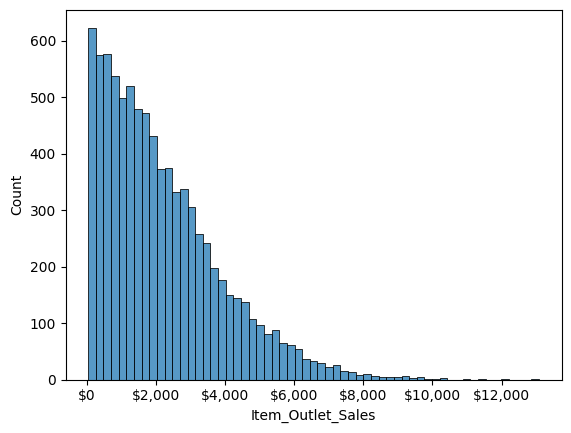

In [22]:
from seaborn.categorical import barplot
fig, ax = plt.subplots()
sns.histplot(df, x="Item_Outlet_Sales");
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

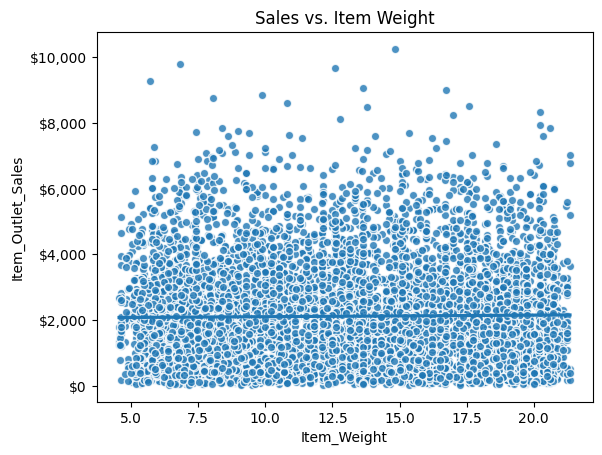

In [23]:
#sales vs. item_weight
fig, ax = plt.subplots()
sns.regplot(df, y="Item_Outlet_Sales", x="Item_Weight", scatter_kws={"edgecolor":"white"});
ax.set_title("Sales vs. Item Weight");
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

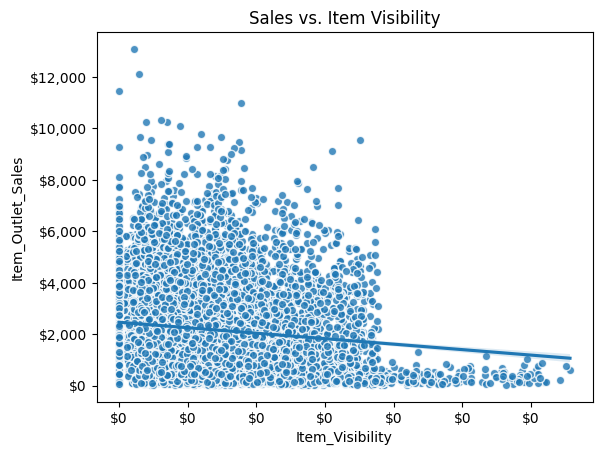

In [24]:
#sales vs. item_visiblity
fig, ax =plt.subplots()
sns.regplot(df, y="Item_Outlet_Sales", x="Item_Visibility", scatter_kws={"edgecolor":"white"});
ax.set_title("Sales vs. Item Visibility");
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

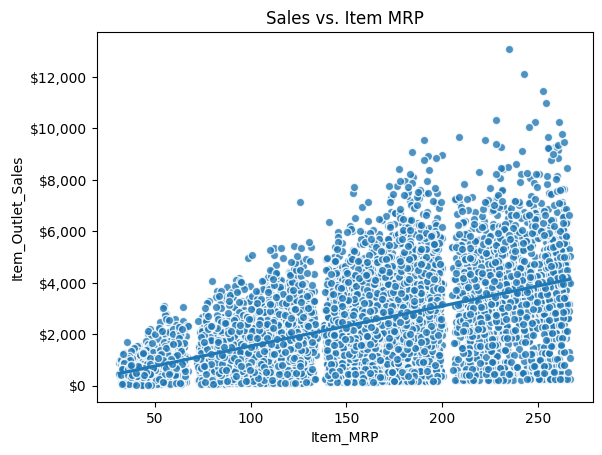

In [25]:
fig, ax = plt.subplots()
#sales vs. item_mrp
sns.regplot(df, y="Item_Outlet_Sales", x="Item_MRP", scatter_kws={"edgecolor":"white"});
ax.set_title("Sales vs. Item MRP");
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

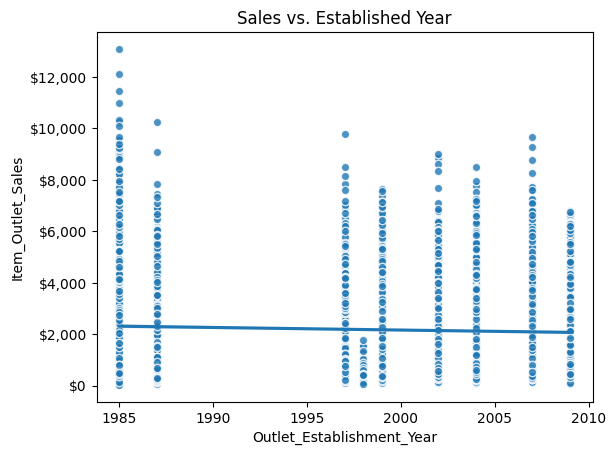

In [26]:
fig, ax = plt.subplots()
#sales vs. outlet_year_est
sns.regplot(df, y="Item_Outlet_Sales", x="Outlet_Establishment_Year", scatter_kws={"edgecolor":"white"});
ax.set_title("Sales vs. Established Year");
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

### Categorical

In [27]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

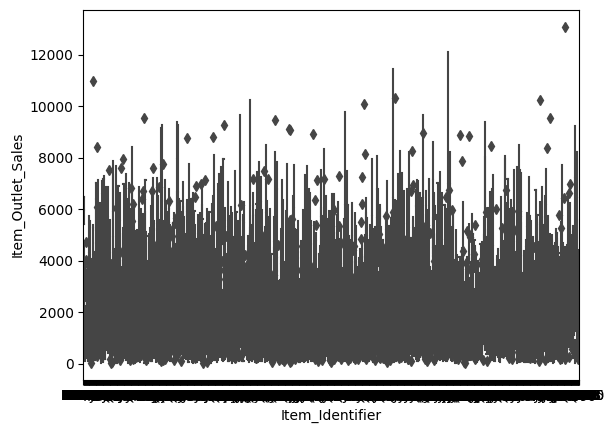

In [28]:
sns.boxplot(df, y="Item_Outlet_Sales", x="Item_Identifier");

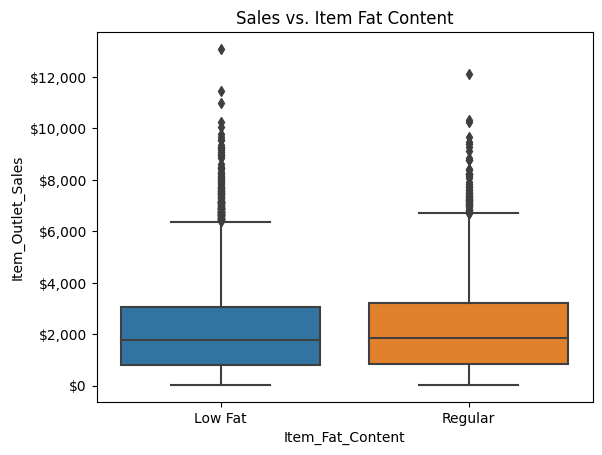

In [29]:
fig, ax = plt.subplots()
sns.boxplot(df, y="Item_Outlet_Sales", x="Item_Fat_Content");
ax.set_title("Sales vs. Item Fat Content")
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

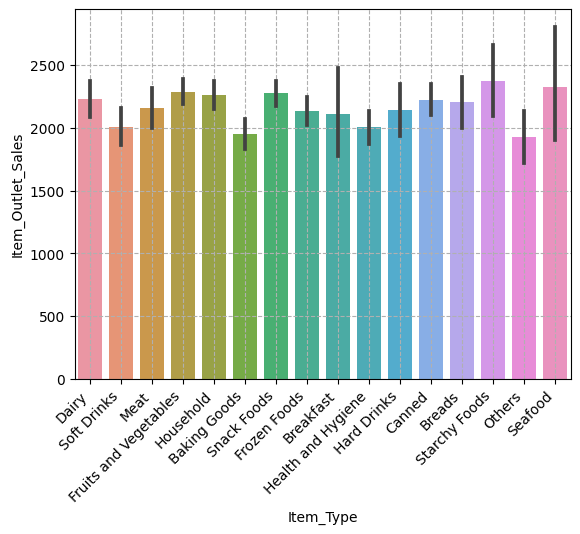

In [30]:
fig, ax = plt.subplots()
sns.barplot(df, y="Item_Outlet_Sales", x="Item_Type");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
ax.grid(ls="--");

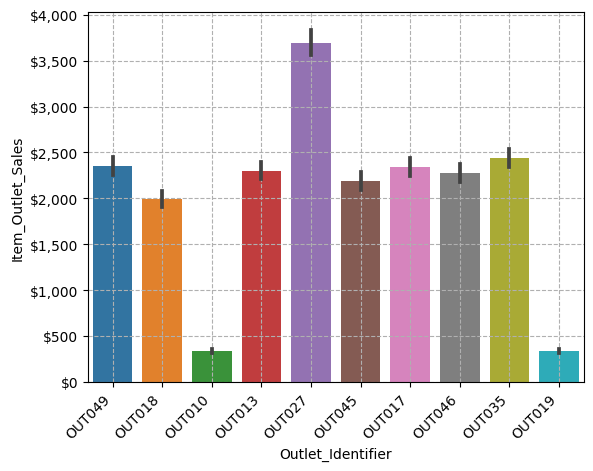

In [31]:
fig, ax = plt.subplots()
sns.barplot(df, y="Item_Outlet_Sales", x="Outlet_Identifier")
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
ax.grid(ls="--");

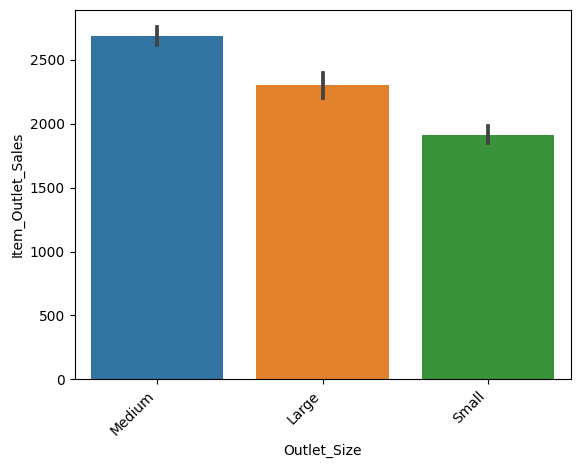

In [32]:
sns.barplot(df, y="Item_Outlet_Sales", x="Outlet_Size");

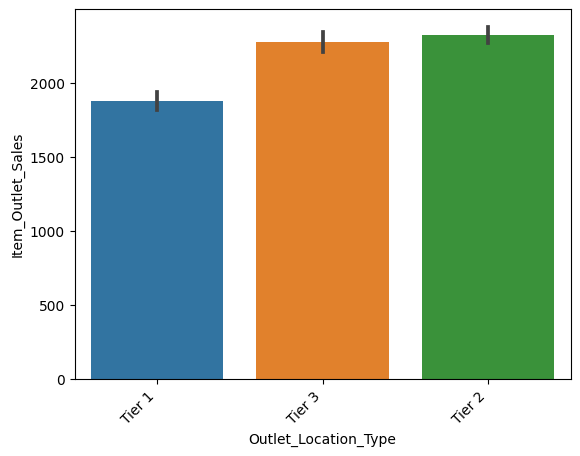

In [77]:
fig, ax = plt.subplots()
sns.barplot(df, y="Item_Outlet_Sales", x="Outlet_Location_Type");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

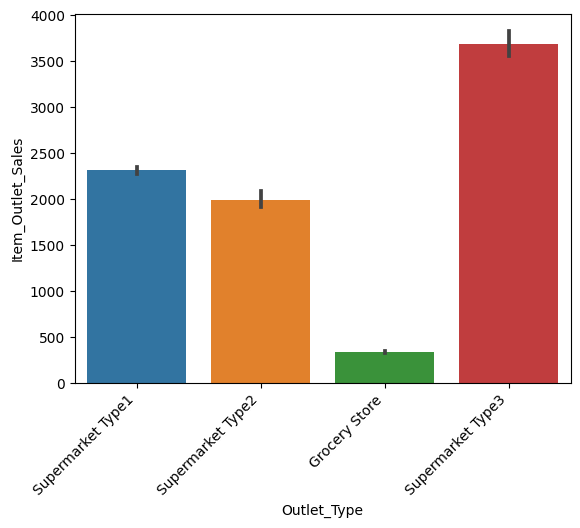

In [78]:
fig, ax = plt.subplots()
sns.barplot(df, y="Item_Outlet_Sales", x="Outlet_Type");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

## Histograms



Our histogram displays the number of stores that sold around 0 to 13,000. This histogram has a negative skew, meaning more stores sold between 0-2000 than the number of stores that sold between 2000-4000. This downward trend continues to the last range of 12,000 to 13,000.





<ipython-input-35-7c31c6330597>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


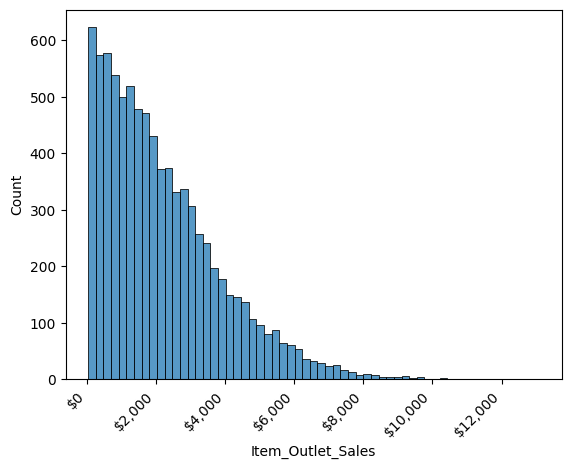

In [35]:
# Putting Item Type in a Histograph
ax = sns.histplot(df, x="Item_Outlet_Sales")
#Rotating and setting horizontal alignment for x category labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

In [36]:
#checking stats on Item Outlet Sales
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Boxplots

#### Sale Median

Showing numerical distribution of `Item_Oulet_Sales` (median, interquartile,min, max, and outliers).

<ipython-input-79-a90575fcecf2>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


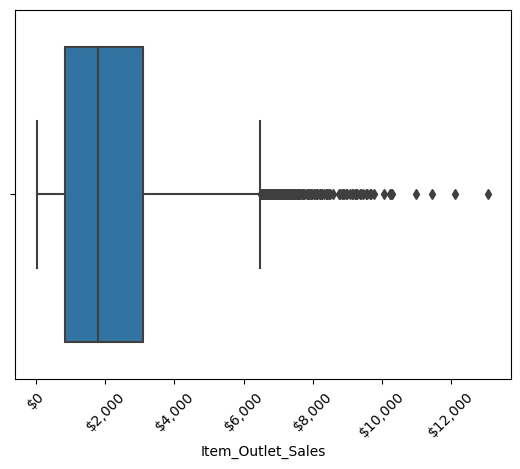

In [79]:
#Setting up subplot
fig, ax = plt.subplots()
#Displaying Outlet sales as boxplot
ax = sns.boxplot(df, x="Item_Outlet_Sales");
#Putting $ and , for Sales
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
#Rotating X-Axis Labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Comparing the median number of sales based on established outlet year.

<ipython-input-80-68d22dae2b99>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels());


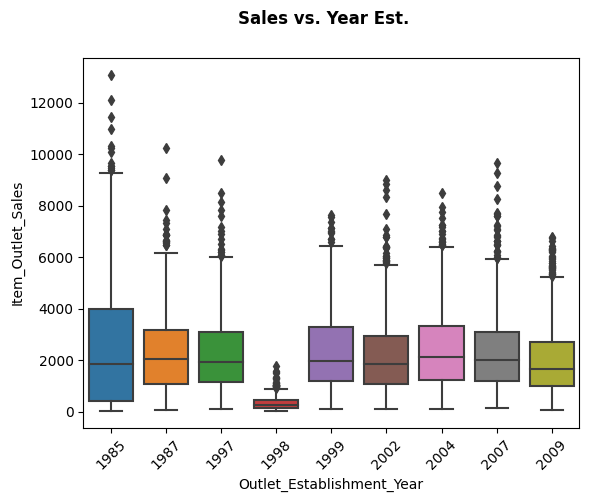

In [80]:
fig, ax = plt.subplots()
#Outlet_Establishment_Year vs. Item_Outlet_Sales
ax = sns.boxplot(df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales");
#Rotating X-Axis Labels
ax.set_yticklabels(ax.get_yticklabels());
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
fig.suptitle("Sales vs. Year Est.", fontweight="bold");

Comparing the median sales with year outlet was established.

## Barplot

#### Outlet Location Type vs. Sales 


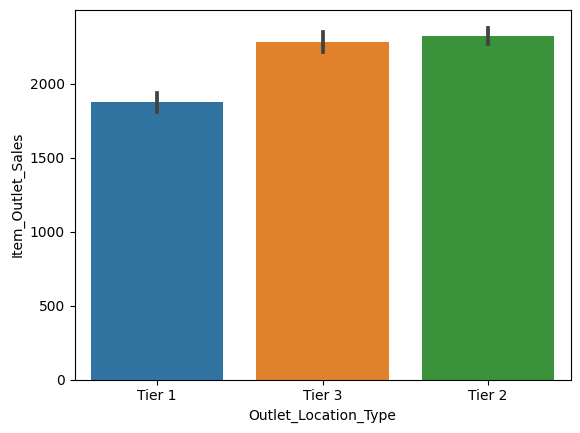

In [39]:
#Plotting Tier vs. Sales in Barplot
sns.barplot(df, x="Outlet_Location_Type", y="Item_Outlet_Sales");
ax.set_title("Outlet Tiers vs. Outlet Sales");

Having a Tier 1 store doesn't necessary produce more sales. Let's take a look at our numeric correlations to see positive trends in our features.

## Heatmap

In [40]:
#Finding correlation between our numeric data
corr = df.corr(numeric_only = True)
#Rounding off for visibility
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


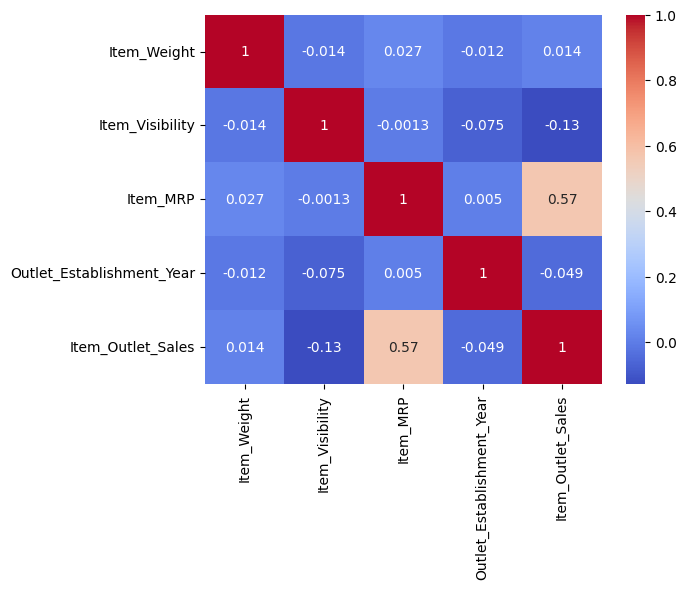

In [41]:
#Creating a heatmap to easily show correlations in our numeric data
sns.heatmap(corr, cmap="coolwarm", annot=True);

Our heatmap easily shows the weak and strong correlation between two variables.  For instance, `Item_Outlet_Sales` & `Item_Weight` have a weak correlation together than `Item_Outlet_Sales` & `Item_MRP`, which has a moderately strong correlation.

# **Explanatory Data Analysis**

* Our goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

* Our target is to increase item sales per outlet, so we inspect the price point of items to see if that contributes to higher sales.

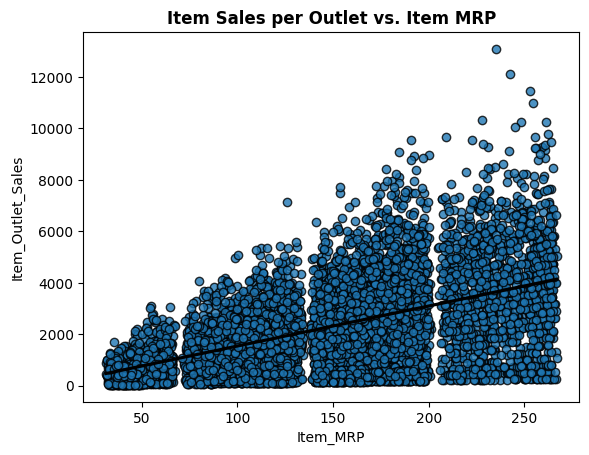

In [42]:
#Plotting Sales vs. MRP
ax=sns.regplot(df, y="Item_Outlet_Sales", x="Item_MRP", scatter_kws={"edgecolor":"black"}, line_kws={"color":"black"})
ax.set_title("Item Sales per Outlet vs. Item MRP", fontweight="bold");

* We see that outlets with sales from 0-2000 mostly sell cheaper products as our points are in tighter clusters then more expensive items.

* This point is also displayed on our outlet that sell more, they sell more expensive items.

* With this plot I conclude, outlets that selling more expensive items could lead to higher sales.  But, what *type of foods* are contributing to higher sales?  Next, we explore those categories.

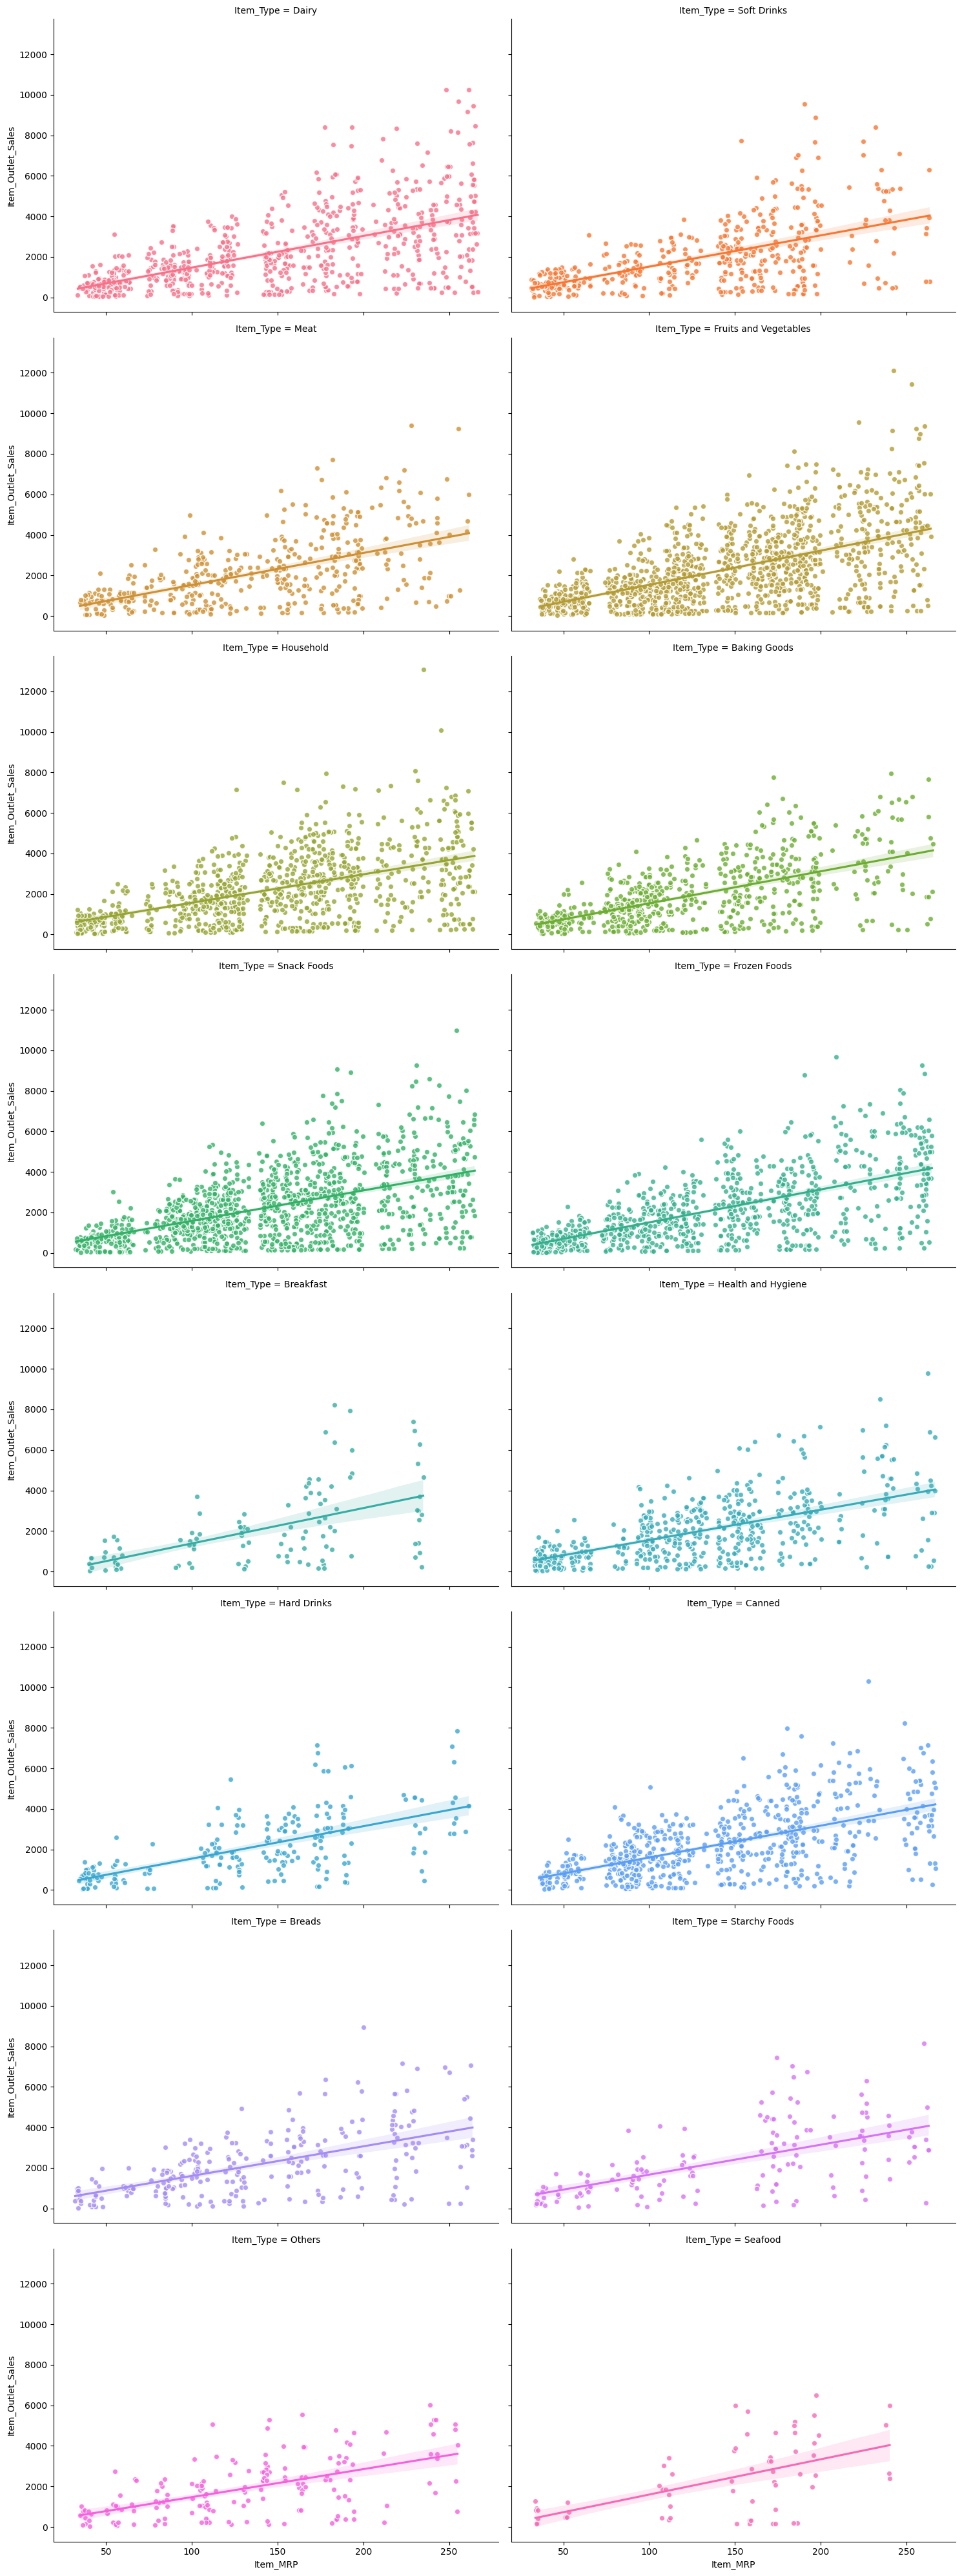

In [43]:
#Plotting each Item Type
g = sns.lmplot(df, y="Item_Outlet_Sales", x="Item_MRP", hue="Item_Type", 
               scatter_kws={"edgecolor":"white"},aspect=1.5, 
               col="Item_Type", col_wrap=2)

* At a quick glance, we can see the different categories of food vs. sales.  All have positive trendline but the more scatterplots indicate more item sales.  Snack Food, Fruites and Veggies and Dairy have more scatterplots indicating these foods sell more.

In [44]:
df["Item_Type"].sort_values()

4261     Baking Goods
5387     Baking Goods
5363     Baking Goods
5362     Baking Goods
5354     Baking Goods
            ...      
7353    Starchy Foods
7363    Starchy Foods
136     Starchy Foods
6723    Starchy Foods
5237    Starchy Foods
Name: Item_Type, Length: 8523, dtype: object

<ipython-input-45-6cf7fe592827>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");


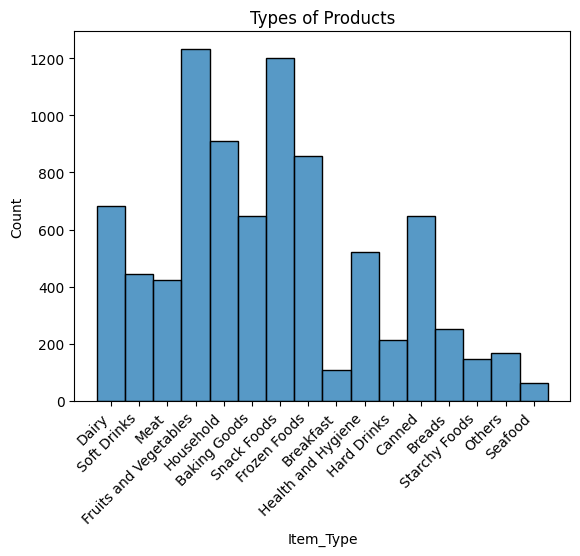

In [45]:
fig, ax = plt.subplots()
ax=sns.histplot(df, x="Item_Type");
ax.set_title("Types of Products");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

## order these from greatest to least
* This shows the quantity of items per food category. We see that the top counts of food categories include:

    1. Fruits and Vegetables
    2. Snack Foods
    3. Household
    4. Frozen Foods




------------------------------

Just take the top 3-5 categories and chart those scatter plots, like below:

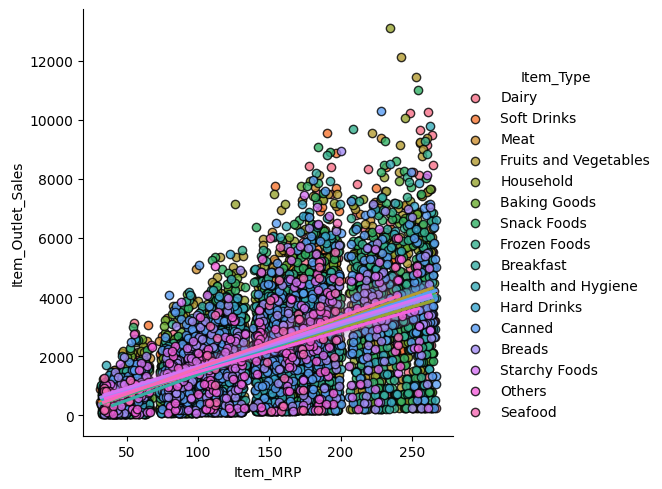

In [46]:
sns.lmplot(df, y="Item_Outlet_Sales", x="Item_MRP", hue="Item_Type", scatter_kws={"edgecolor":"black"})

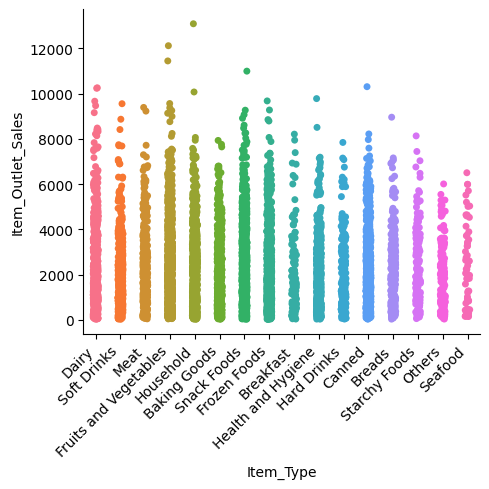

In [47]:
g = sns.catplot(data=df, y="Item_Outlet_Sales", x="Item_Type", hue="Item_Type")
g.set_xticklabels(label="Item_Type", rotation=45, ha="right");
g.tight_layout();

In this category plot, the columns with more scatter points include:
* Dairy
* Fruits and Vegetables
* Snack Foods
* Canned

This information seems to indicate the need for fast and low effort foods.  Adding more ready-made or on-the-go foods may help to raise outlet sales.

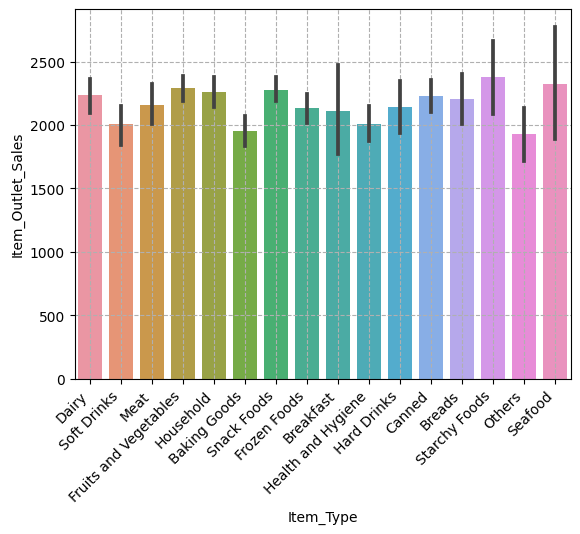

In [48]:
ax= sns.barplot(data=df, y="Item_Outlet_Sales", x="Item_Type");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
ax.grid(ls="--");

Shows the average number of outlet sales per food category. Remember the outliers arent shown here but they will raise the average per category. Seafood is a good example of having high average sales but our solid black line means there are outliers that skew average. 

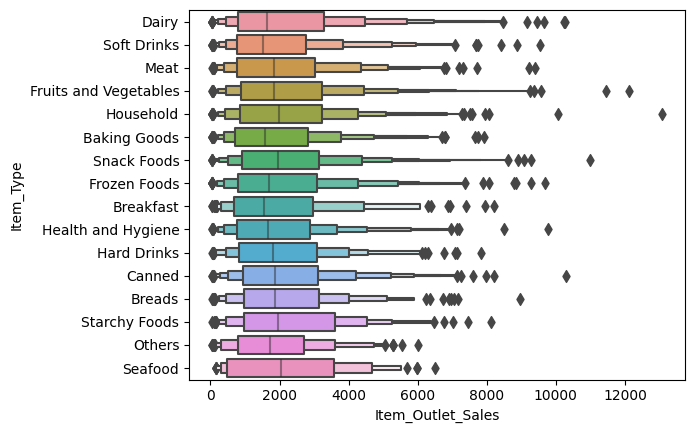

In [49]:
ax = sns.boxenplot(data=df, x="Item_Outlet_Sales", y="Item_Type")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");

## Also order from great to least
Shows the middle range category vs the Outlet Sales. These shows the outliers that can contribute to greater the outlet sales.

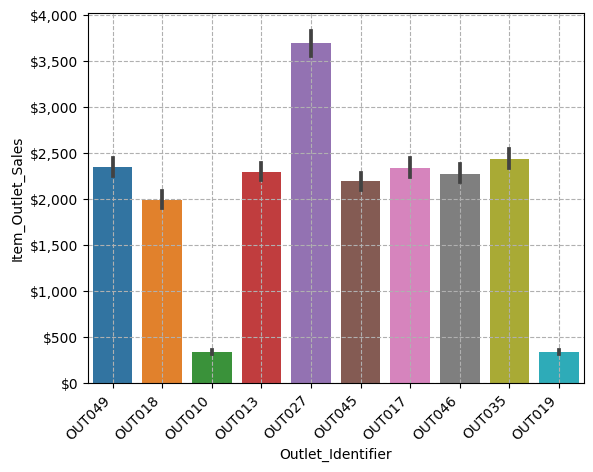

In [50]:
fig, ax = plt.subplots()
sns.barplot(df, y="Item_Outlet_Sales", x="Outlet_Identifier")
#Putting $ and , on Sales axis
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right");
ax.grid(ls="--");

In [51]:
outlet27 = df["Outlet_Identifier"] == "OUT027"
df[outlet27]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,NaN,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


----------
Percentage of sales toward each top category.
* Fruits and Vegetables
* Snack Foods
* Household
* Frozen Foods
* Dairy



In [52]:
#Getting the percentage of each food category
#Adding normalize=True to .value_counts provides ratio (mult by 100 for percentage)
item_type_count = df["Item_Type"].value_counts(normalize=True) *100
item_type_count

Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64

In [53]:
per_item_sales = df.groupby("Item_Outlet_Sales")["Item_Type"].sum()
per_item_sales#.sort_values(ascending=False)

Item_Outlet_Sales
33.2900           Soft DrinksHousehold
33.9558                    Snack Foods
34.6216             Health and Hygiene
35.2874                         Breads
36.6190       Frozen FoodsFrozen Foods
                        ...           
10306.5840                      Canned
10993.6896                 Snack Foods
11445.1020       Fruits and Vegetables
12117.5600       Fruits and Vegetables
13086.9648                   Household
Name: Item_Type, Length: 3493, dtype: object

In [54]:
per_item_sales.values

array(['Soft DrinksHousehold', 'Snack Foods', 'Health and Hygiene', ...,
       'Fruits and Vegetables', 'Fruits and Vegetables', 'Household'],
      dtype=object)

# Preprocessing

## Imports

In [55]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(transform_output='pandas')
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


## Reload Data



In [56]:
#Load data
fpath="/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df2 = pd.read_csv(fpath)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Train Test Split

### Dropping Unwanted Columns

* We are going to drop categorical columns that are high or quasi-constant cardinality, meaning too many values in that feature. This helps to avoid overfitting.

In [57]:
df2.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [58]:
#Droping high and quasi constant categorical columns
df2.drop(columns=["Item_Identifier"], axis=1, inplace=True)

There are some 0.0000 values for our Item Visibility feature that I will replace with the mean value of this column.

In [59]:
vis_median = df2["Item_Visibility"].median()
df2['Item_Visibility'] = df2['Item_Visibility'].replace(0.000000,vis_median)

### Define X & y

In [60]:
#Stating features
X = df2.drop(columns="Item_Outlet_Sales").copy()
#Setting target
y = df2["Item_Outlet_Sales"].copy()
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


### Perform Train Test Split

In [61]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocessing Pipeline

# Modeling

##Linear Regression 

In [82]:
# Get the list of numeric column names 
num_cols = make_column_selector(dtype_include="number")
# # Initialize the preprocessing numericals
scaler = StandardScaler()
# imputing for numericals
impute_median = SimpleImputer(strategy='median')
# # Construct the tuple for column transformer with the scaler
num_pipe = make_pipeline(impute_median, scaler)
num_tuple = ('numeric',num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7fc3041e2680>)

In [83]:
# Get the list of categorical and ordinal column names 
cat_cols = make_column_selector(dtype_include="object")
# Instantiate Imputer for Categoricals
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
#Instantiating for Categoricals
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# Construct the tuple for column transformer with the encoder
cat_pipe = make_pipeline(impute_na, encoder)
# Make a tuple for Cl
cat_tuple = ("categorical", cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7fc2f8785ba0>)

In [84]:
# Instantiate the preprocessor/ColumnTransformer
#Put the tuple (of the transformers) and save as variable
col_transformer = ColumnTransformer([num_tuple, cat_tuple],                               
                                 verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc3041e2680>),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc2f8785ba0>)],
                  verbose_feature_names_out=False)

In [85]:
# Fit the preprocessor on training data 
col_transformer.fit(X_train)
# Transform the training and test data
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6.392000e+03,6.392000e+03,6.392000e+03,6.392000e+03,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,...,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,-4.196337e-16,-2.137075e-16,4.668773e-17,-4.250806e-15,0.040676,0.591834,0.340426,0.013454,0.013611,0.074781,...,0.329005,0.283479,0.279725,0.274562,0.329474,0.395964,0.125000,0.651752,0.110138,0.113110
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,0.197554,0.491533,0.473889,0.115219,0.115878,0.263058,...,0.469889,0.450722,0.448899,0.446328,0.470059,0.489095,0.330745,0.476452,0.313086,0.316752
min,-1.969443e+00,-1.360685e+00,-1.767529e+00,-1.532139e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.968435e-01,-7.486383e-01,-7.638272e-01,-1.293807e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.988932e-02,-3.149013e-01,3.400912e-02,1.361872e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.682034e-01,5.217920e-01,7.172910e-01,7.320181e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.013127e+00,5.355486e+00,1.994559e+00,1.327849e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(col_transformer, linreg)
#Fit on both X & y training set
linreg_pipe.fit(X_train_tf, y_train)
#Predict X train and X test
train_pred = linreg_pipe.predict(X_train_tf)
test_pred = linreg_pipe.predict(X_test_tf)

### Evaluate the Model Performance




#### R2

In [87]:
# Evaluate the model performance on both the training set and the test set using the R-squared score, MAE, MSE, and RMSE
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f"Train Model R2: {train_r2:,.2f}")
print(f"Test Model R2: {test_r2:,.2f}")

Train Model R2: 0.56
Test Model R2: 0.57


#### Root Mean Square Error

In [88]:
#Evaluate the model performance on both the training set and the test set using the R-squared score, MAE, MSE, and RMSE
train_rsme = mean_squared_error(y_train, train_pred, squared=False)
test_rsme = mean_squared_error(y_test, test_pred, squared=False)
print(f"Train Model RSME: {train_rsme:,.2f}")
print(f"Test Model RSME: {test_rsme:,.2f}")

Train Model RSME: 1,139.04
Test Model RSME: 1,092.88


## Decision Regression Tree

In [89]:
# By leaving the parenthesis empty, we are choosing to use all of the default parameters
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree_pipe = make_pipeline(col_transformer, dec_tree)
#Fit training data into our Decision Tree
dec_tree_pipe.fit(X_train_tf, y_train)
# Make predictions for training and testing data
train_pred = dec_tree_pipe.predict(X_train_tf)
test_pred = dec_tree_pipe.predict(X_test_tf)

In [90]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5285.000000,6392.000000,6392.000000,6392.000000
mean,12.904458,0.069382,141.980400,1997.857165
std,4.637034,0.048367,62.629276,8.392300
min,4.555000,0.003575,31.290000,1985.000000
25%,8.895000,0.033175,94.146200,1987.000000
50%,12.650000,0.054152,144.110200,1999.000000
75%,17.000000,0.094618,186.900300,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


### Evaluate the Model Performance


#### R2


In [91]:
# R2 score for Decision Tree
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)
print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 1.0
Test score: 0.16789260715215826


#### Root Mean Square Error

In [92]:
#Evaluate the model performance on both the training set and the test set using the R-squared score, MAE, MSE, and RMSE
train_rsme = mean_squared_error(y_train, train_pred, squared=False)
test_rsme = mean_squared_error(y_test, test_pred, squared=False)
print(f"Train Model RSME: {train_rsme:,.2f}")
print(f"Test Model RSME: {test_rsme:,.2f}")

Train Model RSME: 0.00
Test Model RSME: 1,515.18


In [74]:
dec_tree.get_depth()

47

###For Loop on Decision Tree

Since the Decision Tree has the better R2 Do a for loop to go through all the `max_depth` for the decision tree and pick the best metrics (MAE, MSE, RSME). youll have to plt.plot to visualize and/or sort_values. Something like this...we can tune the max_depth we allow for our Decision Tree.

In [75]:
#Make list of depths to try
depths = range(1, 47)

# Make dataframe for results
scores = pd.DataFrame(index=depths, columns=["Train Score", "Test Score"])

# Try the different values for depths
for depth in depths:    
   model = DecisionTreeRegressor(random_state = 42, max_depth=depth)
   # Fit the model on training data
   model.fit(X_train_tf, y_train)
   # Make predictions on training and test data
   train_preds = model.predict(X_train_tf)
   test_preds = model.predict(X_test_tf)
   # Obtain scores and add to dataframe
   scores.loc[depth, 'Train Score'] = r2_score(y_train, train_preds)
   scores.loc[depth, 'Test Score'] = r2_score(y_test, test_preds)

# View first 5 rows of score dataframe
scores.head()

,Train Score,Test Score
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582633,0.58399
5,0.603925,0.594761


#### Visualizing Decision Tree Depth

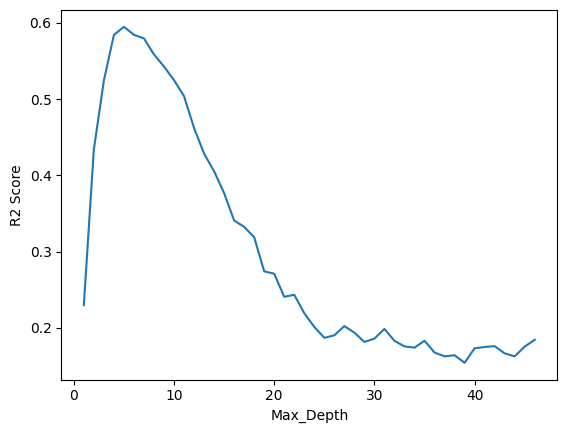

In [96]:
plt.plot(scores["Test Score"]);
plt.xlabel("Max_Depth")
plt.ylabel("R2 Score");

###R2

In [76]:
# Decision Tree R2 Results
sorted_scores = scores.sort_values(by="Test Score", ascending=False)
sorted_scores.head()

,Train Score,Test Score
5,0.603925,0.594761
6,0.615253,0.584273
4,0.582633,0.58399
7,0.629732,0.5795
8,0.643697,0.55851


By setting our Decision Tree's hyperparameter to a `max_depth` of 5 we get the best overall Training and Test Scores.